#### pytorch搭建神经网络模型，调试超参数，观察学习率和批次大小对训练的影响。


In [29]:
#导入包
import torch
from torchvision.datasets import KMNIST
from torchvision.transforms import ToTensor 
from torch.utils.data import DataLoader
import torch.nn as nn

# 定义超参数
LR = 0.1  #学习率调整 1.LR：0.01->Accuracy: 72.46000000000001%; 2. LR:0.005->Accuracy: 68.12% 3.LR：0.001->Accuracy: 53.400000000000006% 4.LR:0.1->Accuracy: 86.1%
epochs = 10 #训练轮次，100轮左右损失率降到了1以下，1000轮降到0.3左右，Accuracy: 76.03%
BATCH_SIZE = 32  #size:246->Accuracy: 82.49% ;size:128->Accuracy: 86.52% ; size:64->Accuracy: 88.07000000000001%;size:32->Accuracy: 88.97%


#数据集加载
train_data = KMNIST(root='./kmnist_data', train=True, download=True, transform=ToTensor())
test_data = KMNIST(root='./kmnist_data', train=False, download=True, transform=ToTensor())

#数据分批次处理
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True) # shuffle：随机打乱数据
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True) # shuffle：随机打乱数据


# 模型创建 
# 隐藏层仅1层，使用ReLU函数
# model = nn.Sequential(
#     nn.Linear(784, 128),  #输入层
#     nn.ReLU(),     #隐藏层
#     nn.Linear(128, 10)  #输出层
# )

models = torch.nn.ModuleList([
    nn.Sequential(
        nn.Linear(784,512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ) for _ in range(3)
])


In [27]:
import matplotlib.pyplot as plt

# 绘制模型
def draw_train_hist(hist_list):
    for i, hist in enumerate(hist_list):
        plt.plot(hist, label=f'Loss{i}')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Training Loss")
    plt.show()

In [30]:
def train_iter(epochs, model, train_dl, lr):
    train_hist = []
    #损失函数和优化器
    loss_fn = nn.CrossEntropyLoss() #交叉熵损失函数

    #优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr) #SGD优化器

    ###加上训练轮次
    # 训练加速，数据加载器，分批次
    for epoch in range(epochs):
        for data, target in train_dl:
            #前向运算
            output = model(data.reshape(-1, 784))
            #计算损失
            loss = loss_fn(output, target) #计算梯度
            #反向传播
            optimizer.zero_grad() #所有参数梯度清零
            loss.backward()  #计算梯度（参数.grad）
            optimizer.step() #更新参数
        print(f'Epoch:{epoch}, Loss:{loss.item()}')
        train_hist.append(loss.item())
    return train_hist

In [ ]:
# 学习率的影响
train_hits = [    
    train_iter(epochs, model, train_dl, lr)
        for model, lr in zip(models, [0.01, 0.001, 0.0001])]



Epoch:0, Loss:0.8116421103477478
Epoch:1, Loss:0.5961756110191345
Epoch:2, Loss:0.23376420140266418
Epoch:3, Loss:0.20717452466487885
Epoch:4, Loss:0.2128164917230606
Epoch:5, Loss:0.3238697648048401
Epoch:6, Loss:0.3132897913455963
Epoch:7, Loss:0.10647770017385483
Epoch:8, Loss:0.1358068734407425
Epoch:9, Loss:0.05594656243920326
Epoch:0, Loss:2.2113451957702637
Epoch:1, Loss:1.8845038414001465
Epoch:2, Loss:1.5744647979736328
Epoch:3, Loss:1.507197618484497
Epoch:4, Loss:1.1315644979476929
Epoch:5, Loss:0.8569340705871582
Epoch:6, Loss:0.677425742149353
Epoch:7, Loss:0.6164182424545288
Epoch:8, Loss:0.8175429105758667
Epoch:9, Loss:0.6190482378005981
Epoch:0, Loss:2.3063201904296875
Epoch:1, Loss:2.288332939147949
Epoch:2, Loss:2.297525644302368
Epoch:3, Loss:2.2966420650482178
Epoch:4, Loss:2.2684357166290283
Epoch:5, Loss:2.2631781101226807
Epoch:6, Loss:2.2730653285980225
Epoch:7, Loss:2.2334837913513184
Epoch:8, Loss:2.246464729309082
Epoch:9, Loss:2.2077836990356445


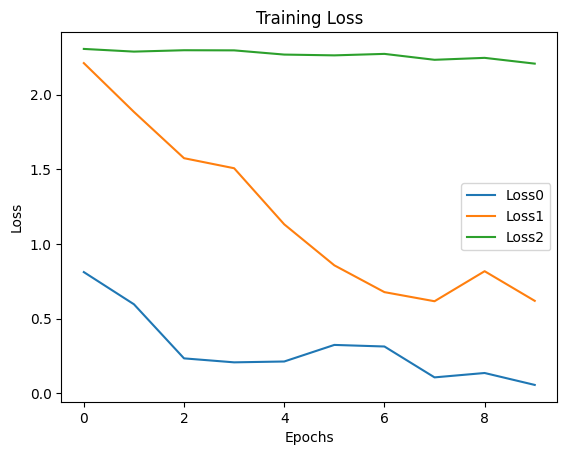

In [28]:
draw_train_hist(train_hits)

In [ ]:
#批次大小的影响
train_datas = [DataLoader(train_data, batch_size=bs, shuffle=True) 
               for bs in [128, 256, 512]]

train_hits = [train_iter(epochs, model, dl, lr=0.01) 
              for model, dl in zip(models, train_datas)]

Epoch:0, Loss:1.7778459787368774
Epoch:1, Loss:1.1159634590148926
Epoch:2, Loss:0.8302183747291565
Epoch:3, Loss:0.5868623852729797
Epoch:4, Loss:0.8175091743469238
Epoch:5, Loss:0.4455502927303314
Epoch:6, Loss:0.6420217156410217
Epoch:7, Loss:0.4145153760910034
Epoch:8, Loss:0.5642609596252441
Epoch:9, Loss:0.4853576421737671
Epoch:0, Loss:2.1811580657958984
Epoch:1, Loss:1.8386579751968384
Epoch:2, Loss:1.4211444854736328
Epoch:3, Loss:0.9842382073402405
Epoch:4, Loss:0.8737900853157043
Epoch:5, Loss:0.8703669905662537
Epoch:6, Loss:0.6330538988113403
Epoch:7, Loss:0.642812967300415
Epoch:8, Loss:0.5658665299415588
Epoch:9, Loss:0.5451786518096924
Epoch:0, Loss:2.259542226791382
Epoch:1, Loss:2.177029609680176
Epoch:2, Loss:2.0504820346832275
Epoch:3, Loss:1.852254033088684
Epoch:4, Loss:1.5678730010986328
Epoch:5, Loss:1.4688373804092407
Epoch:6, Loss:1.0076285600662231
Epoch:7, Loss:0.9822442531585693
Epoch:8, Loss:0.9232940673828125
Epoch:9, Loss:0.8388733863830566


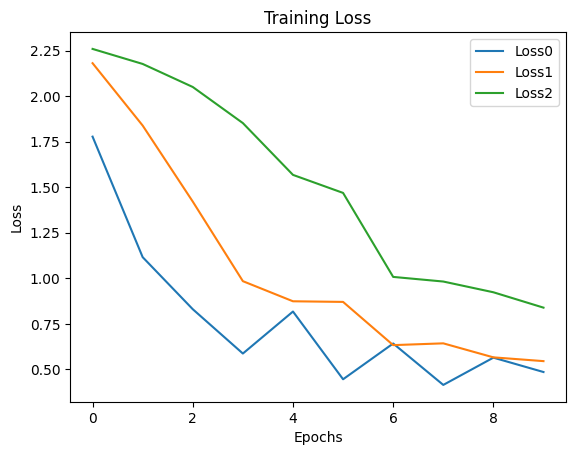

In [32]:
draw_train_hist(train_hits)

In [13]:
# 测试
def test_acc(test_dl, model):
    # test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

    correct = 0
    total = 0

    with torch.no_grad(): #不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1) #返回第一个维度的最大值张量
            total += target.size(0) #返回张量的样本量
            correct += (predicted == target).sum().item()
    # print(f'Accuracy: {correct/total*100}%')
    return correct/total*100